In [1]:
import pyautogui

# 常用函数

### 屏幕坐标系

![](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/v2-23b0c0466ae08e8a3f370c5b46bb1217_720w.jpg)

In [2]:
pyautogui.size()  # 获取屏幕尺寸（分辨率×分辨率）

Size(width=1920, height=1080)

In [3]:
pyautogui.position() # 获取鼠标当前位置

Point(x=2829, y=407)

In [4]:
pyautogui.onScreen(100,200) # 判断坐标是否在屏幕范围内

True

### 鼠标控制

In [13]:
sizex,sizey=pyautogui.size() # 保存屏幕尺寸
#绝对位置移动，移动至屏幕正中心，鼠标移动过渡时间duration设为1秒
pyautogui.moveTo(sizex/2,sizey/2,duration=1)
# 相对位置移动，向右100、向上200，鼠标移动过渡时间duration设为0.5秒
pyautogui.moveRel(100, -200, duration=0.5)

鼠标点击，一个click()函数把点鼠标的活包干，过程也可分解为mouseDown()、mouseUp()；另有在click()之上封装的rightClick()、middleClick()、doubleClick()、tripleClick()等函数。

In [15]:
# 不指定x、y，在当前位置点击一下右键
pyautogui.click(button='right')
# 移动至(100,100)点击3次左键，点击间隔0.1s，鼠标移动过渡时间0.5秒
pyautogui.click(100,100, clicks=3,interval=0.1,duration=0.5)

滚动鼠标滚轮

In [19]:
# 鼠标位置不动，向上回滚2个单位
pyautogui.scroll(2)      # 运行发现鼠标并没有动

鼠标拖曳，指从当前位置按下鼠标，移动至目标位置再释放的过程

In [20]:
# 将鼠标从当前位置拖至屏幕中心，默认左键
pyautogui.dragTo(sizex/2,sizey/2)
# 将鼠标从当前位置向左100像素、向右200像素拖动，过渡时间0.5秒，指定右键
pyautogui.dragRel(-100,200,duration=0.5,button='right')

### 键盘控制

控制按键，也是一个press()函数基本把活包干，按键动作往细分解包含keyDown()和keyUp()两个过程；

在此基础上封装，有typewrite()和hotkey()两个高阶一点的函数，分别用于输入字符串和按快捷键。

In [26]:
# 键名用字符串表示，支持的所有键名，存在pyautogui.KEYBOARD_KEYS变量中，包括26个字母、数字、符号、F1~F12、方向等等所有按键
pyautogui.press('A') # 按字母A键，字母支持大小写
# 传入键名列表（按键p、按键y、空格），按键之间间隔0.1秒（默认0）
pyautogui.press(['p','y','space'], interval=0.1)
# typewrite方式一：传入字符串，不支持中文字符，因为函数无法知道输入法需要什么按键才能得到中文字符
pyautogui.typewrite('hello, PyAutoGUI!\n')
# typewrite方式二：传入键名列表，按键之间间隔0.1秒（默认0）
pyautogui.typewrite(['s','r','f','space'], interval=0.1)
# 大小写字母是自动支持的，仍然尝试一次切换到大写
pyautogui.typewrite(['capslock','p','y'])

# hotkey屏蔽了需要反复keyDown、keyUp的细节，参数是任意个键名，而非列表
pyautogui.hotkey('ctrl', 'shift', 'esc') #调出任务管理器

### 消息窗口

PyAutoGUI利用pymsgbox的功能，以JavaScript风格函数提供消息框功能，包括alert()、confirm()、prompt() 、password()，连参数都是一致的

In [31]:
pyautogui.alert(text='警告',title='PyAutoGUI消息框',button='OK')

'OK'

![](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/Snipaste_2021-01-28_09-10-37.png)

In [32]:
pyautogui.confirm(text='请选择',title='PyAutoGUI消息框',buttons=['1','2','3'])

'2'

![](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/Snipaste_2021-01-28_09-10-49.png)

In [33]:
pyautogui.prompt(text='请输入',title='PyAutoGUI消息框',default='请输入')

'请输入'

![](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/Snipaste_2021-01-28_09-11-02.png)

In [34]:
pyautogui.password(text='输入密码',title='PyAutoGUI消息框',default='',mask='*')

'123456'

![](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/Snipaste_2021-01-28_09-11-17.png)

### 截图相关

PyAutoGUI提供了screenshot()函数进行屏幕截图，返回是Image对象，这是在Pillow库中定义的，因此需要安装Pillow库才能正常工作。

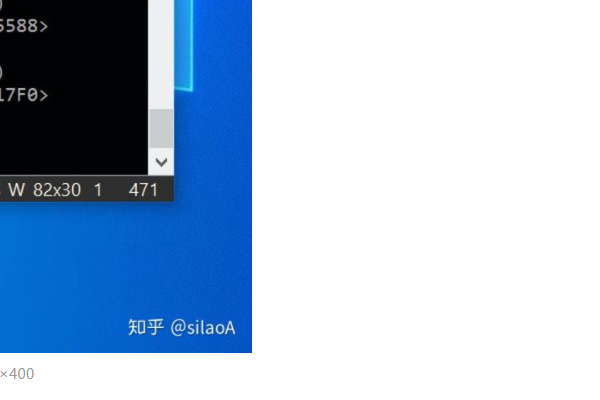

In [42]:
# imageFilename参数，截图要保存的文件全路径名，默认`None`，不保存；
# region参数，截图区域，由左上角坐标、宽度、高度4个值确定，如果指定区域超出了屏幕范围，超出部分会被黑色填充，默认`None`,截全屏
pyautogui.screenshot('shot.png',region=(1000,600,600,400))

PyAutoGUI还有个图片匹配功能，它是在屏幕按像素匹配，定位图片在屏幕上的坐标位置，locateOnScreen()函数返回region对象,即左上角坐标、宽度、高度4个值组成的元组，再用center()函数计算出中心坐标，locateCenterOnScreen()函数则一步到位，返回中心坐标。如果把需要点击的菜单、按钮事先保存成图片，可以用来自动查找菜单、按钮位置，再交由click()函数控制鼠标去点击。

In [45]:
loc = pyautogui.locateCenterOnScreen("Snipaste_2021-01-28_09-19-37.png", region=(0, 0,sizex, sizey) ) # region参数限制查找范围，加快查找速度
pyautogui.moveTo(*loc, duration=0.5) # 移动鼠标
pyautogui.click(clicks=1) #点击